In [1]:
import segy2seg2, obspy
import numpy as np
import matplotlib.pyplot as plt 


In [10]:
n = "1700_n"
filename = "Sample_Segy_Files/shot"+n+".segy"
newfileName = "conv_"+n+".dat"
segy2seg2.convert(filename, newfileName)

file contains an invalied TRACE SORT method, set a valied TRACE SORT method
file contains an invalid unit, set a valied unit


In [11]:
strm = obspy.read(filename)
strm2 = obspy.read(newfileName)
data_segy = []
data_seg2 = []
for tr1, tr2 in zip(strm, strm2):
    tr1_np = np.array(tr1.data)
    tr1_np = 10*tr1_np/np.max(tr1_np)
    data_segy.append(tr1_np + float(tr1.stats.segy.trace_header.group_coordinate_x))
    tr2_np = np.array(tr2.data)
    tr2_np = 10*tr2_np/np.max(tr2_np)
    data_seg2.append(tr2_np + float(tr2.stats.seg2.RECEIVER_LOCATION))


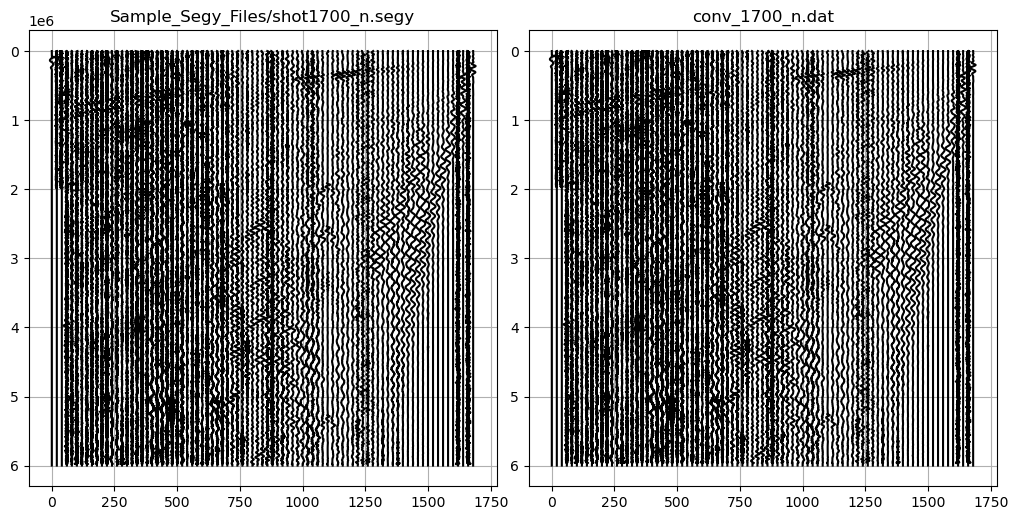

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2, figsize=(10,5), dpi=100)
ax[0].grid(True)
ax[1].grid(True)
ts = float(strm[0].stats.segy.trace_header.sample_interval_in_ms_for_this_trace)
e = len(strm[0].data)
t_y = np.arange(0, ts*(e), ts)
for tr in data_segy:
    ax[0].plot(tr,t_y, 'k')
ax[0].invert_yaxis()
ax[0].set_title(filename)

ts = float(strm2[0].stats.seg2.SAMPLE_INTERVAL)
e = len(strm2[0].data)
t_2 = np.arange(0, ts*(e), ts)
for tr in data_seg2:    
    ax[1].plot(tr,t_2, 'k')
ax[1].invert_yaxis()
ax[1].set_title(newfileName)
plt.tight_layout(pad=0)

In [3]:
filename = "Sample_Segy_Files/shot"+"1700_p"+".segy"
str = obspy.read(filename, unpack_trace_headers=True)
print(str.stats.binary_file_header)

AttribDict({'endian': '>', 'job_identification_number': 1, 'line_number': 1, 'reel_number': 1, 'number_of_data_traces_per_ensemble': 1, 'number_of_auxiliary_traces_per_ensemble': 0, 'sample_interval_in_microseconds': 2000, 'sample_interval_in_microseconds_of_original_field_recording': 0, 'number_of_samples_per_data_trace': 3000, 'number_of_samples_per_data_trace_for_original_field_recording': 0, 'data_sample_format_code': 1, 'ensemble_fold': 0, 'trace_sorting_code': 0, 'vertical_sum_code': 0, 'sweep_frequency_at_start': 0, 'sweep_frequency_at_end': 0, 'sweep_length': 0, 'sweep_type_code': 0, 'trace_number_of_sweep_channel': 0, 'sweep_trace_taper_length_in_ms_at_start': 0, 'sweep_trace_taper_length_in_ms_at_end': 0, 'taper_type': 0, 'correlated_data_traces': 0, 'binary_gain_recovered': 0, 'amplitude_recovery_method': 0, 'measurement_system': 0, 'impulse_signal_polarity': 0, 'vibratory_polarity_code': 0, 'unassigned_1': b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

In [6]:
print(len(str[0]))

3000
